# Importing the libraries and reading Dataset

In [ ]:
# importing all libraries and modules

import pandas as pd
import numpy as np
import nltk
import wikipedia
import nltk.data
import matplotlib.pyplot as plt

%matplotlib inline

from nltk import SnowballStemmer
import re
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
movies_df = pd.read_csv("C:\\Users\\Admin\\Documents\\Machine Learning\\movie.csv")    
movies_df

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
5,5,One Flew Over the Cuckoo's Nest,[u' Drama'],"In 1963 Oregon, Randle Patrick ""Mac"" McMurphy ...","In 1963 Oregon, Randle Patrick McMurphy (Nicho..."
6,6,Gone with the Wind,"[u' Drama', u' Romance', u' War']",\r\nPart 1\r\n \r\n Part 1 Part 1 \r\n \r...,"The film opens in Tara, a cotton plantation ow..."
7,7,Citizen Kane,"[u' Drama', u' Mystery']",\r\n\r\n\r\n\r\nOrson Welles as Charles Foster...,"It's 1941, and newspaper tycoon Charles Foster..."
8,8,The Wizard of Oz,"[u' Adventure', u' Family', u' Fantasy', u' Mu...",The film starts in sepia-tinted Kansas in the ...,Dorothy Gale (Judy Garland) is an orphaned tee...
9,9,Titanic,"[u' Drama', u' Romance']","In 1996, treasure hunter Brock Lovett and his ...","In 1996, treasure hunter Brock Lovett and his ..."


In [ ]:

# merging the plots of imdb and wikipedia together to increase accuracy and robustness


movies_df['plot'] = movies_df['wiki_plot'].astype(str) + "\n" + \
                 movies_df['imdb_plot'].astype(str)
movies_df.head()


,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


# Tokenization

In [ ]:
# taking four sentences from Godfather and tokenizing them into different scentences.

tokenized_sent = [sent for sent in nltk.sent_tokenize("""On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. 
                        Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. 
                        Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. 
                        Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion
                        """)]

print("tokenized_sentences")
print(tokenized_sent)


# tokenizing our 2nd sentence into different words

tokenized_word = [word for word in nltk.word_tokenize(tokenized_sent[1])]
print("\n tokenized_word")
print(tokenized_word)

# removing numeric values, punctuations and other irrelevant details
filtered = [word for word in tokenized_word if re.search('[a-zA-Z]', word)]

print("\nfiltered words")
print(filtered)


tokenized_sentences
["On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family.", "Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception.", "Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz.", 'Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion']

 tokenized_word
['Vito', "'s", 'youngest', 'son', ',', 'Michael', ',', 'in', 'a', 'Marine', 'Corps', 'uniform', ',', 'introduces', 'his', 'girlfriend', ',', 'Kay', 'Adams', ',', 'to', 'his', 'family', 'at', 'the', 'sprawling', 'reception', '.']

filtered words
['Vito', "'s", 'youngest', 'son', 'Michael', 'in', 'a', 'Marine', 'Corps', 'uniform', 'introduces', 'his', 'girlfriend',

# Stemming

In [ ]:
# how our sentences look before and after stemming

stemming = SnowballStemmer("english")
print("Without stemming: ", filtered)
words_stemmed = [stemming.stem(word) for word in filtered]
print("After stemming:   ", words_stemmed)

Without stemming:  ['Vito', "'s", 'youngest', 'son', 'Michael', 'in', 'a', 'Marine', 'Corps', 'uniform', 'introduces', 'his', 'girlfriend', 'Kay', 'Adams', 'to', 'his', 'family', 'at', 'the', 'sprawling', 'reception']
After stemming:    ['vito', "'s", 'youngest', 'son', 'michael', 'in', 'a', 'marin', 'corp', 'uniform', 'introduc', 'his', 'girlfriend', 'kay', 'adam', 'to', 'his', 'famili', 'at', 'the', 'sprawl', 'recept']


# Tokenize and Stem

In [ ]:
# defining function to tokenize and stem our plots

stemmer = SnowballStemmer("english")
def tok_and_stem(text):
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    stemmed = [stemmer.stem(word) for word in filtered_tokens]
    
    return stemmed

stemmed_output = tok_and_stem("On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. \
                        Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. \
                        Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion")
print(stemmed_output)

['on', 'the', 'day', 'of', 'his', 'onli', 'daughter', "'s", 'wed', 'vito', 'corleon', 'hear', 'request', 'in', 'his', 'role', 'as', 'the', 'godfath', 'the', 'don', 'of', 'a', 'new', 'york', 'crime', 'famili', 'vito', "'s", 'youngest', 'son', 'michael', 'in', 'a', 'marin', 'corp', 'uniform', 'introduc', 'his', 'girlfriend', 'kay', 'adam', 'to', 'his', 'famili', 'at', 'the', 'sprawl', 'recept', 'vito', "'s", 'godson', 'johnni', 'fontan', 'a', 'popular', 'singer', 'plead', 'for', 'help', 'in', 'secur', 'a', 'covet', 'movi', 'role', 'so', 'vito', 'dispatch', 'his', 'consiglier', 'tom', 'hagen', 'to', 'los', 'angel', 'to', 'influenc', 'the', 'abras', 'studio', 'head', 'jack', 'woltz', 'woltz', 'is', 'unmov', 'until', 'the', 'morn', 'he', 'wake', 'up', 'in', 'bed', 'with', 'the', 'sever', 'head', 'of', 'his', 'prize', 'stallion']


# TF-IDF Vectorizer

In [ ]:
# creating object of TfidfVectorizer


tfidf_vector = TfidfVectorizer(max_df=0.8, max_features=200000,
                         min_df=0.2, stop_words='english',
                        use_idf=True, tokenizer=tok_and_stem,
                      ngram_range=(1,3))


In [ ]:
# computing tf * idf scores for each token in different plots


matrix_tfidf = tfidf_vector.fit_transform([x for x in movies_df['plot']])

print(matrix_tfidf.shape)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(100, 564)


# Exploratory Data Analysis

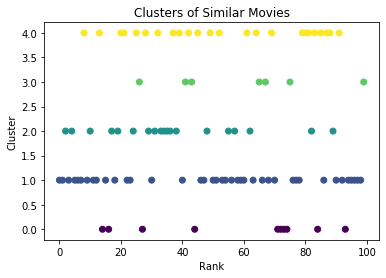

<Figure size 432x216 with 0 Axes>

In [ ]:

# creating different cluster on the basis of the tfidf score of each word in a plot

k_means = KMeans(n_clusters=5)
k_means.fit(matrix_tfidf)
clusters = k_means.labels_.tolist()

movies_df["cluster"] = clusters
movies_df['cluster'].value_counts()
plt.scatter(movies_df['rank'],movies_df['cluster'], c= movies_df['cluster'])
plt.title('Clusters of Similar Movies')
plt.xlabel('Rank')
plt.ylabel('Cluster')
fig = plt.figure(figsize = (6,3))


plt.show()
#movies_df['cluster']


In [ ]:

#calculating cosine similarity between different plots based on the tfidf score of words each plot 



sim_dist = 1 - cosine_similarity(matrix_tfidf)


# Dendrogram

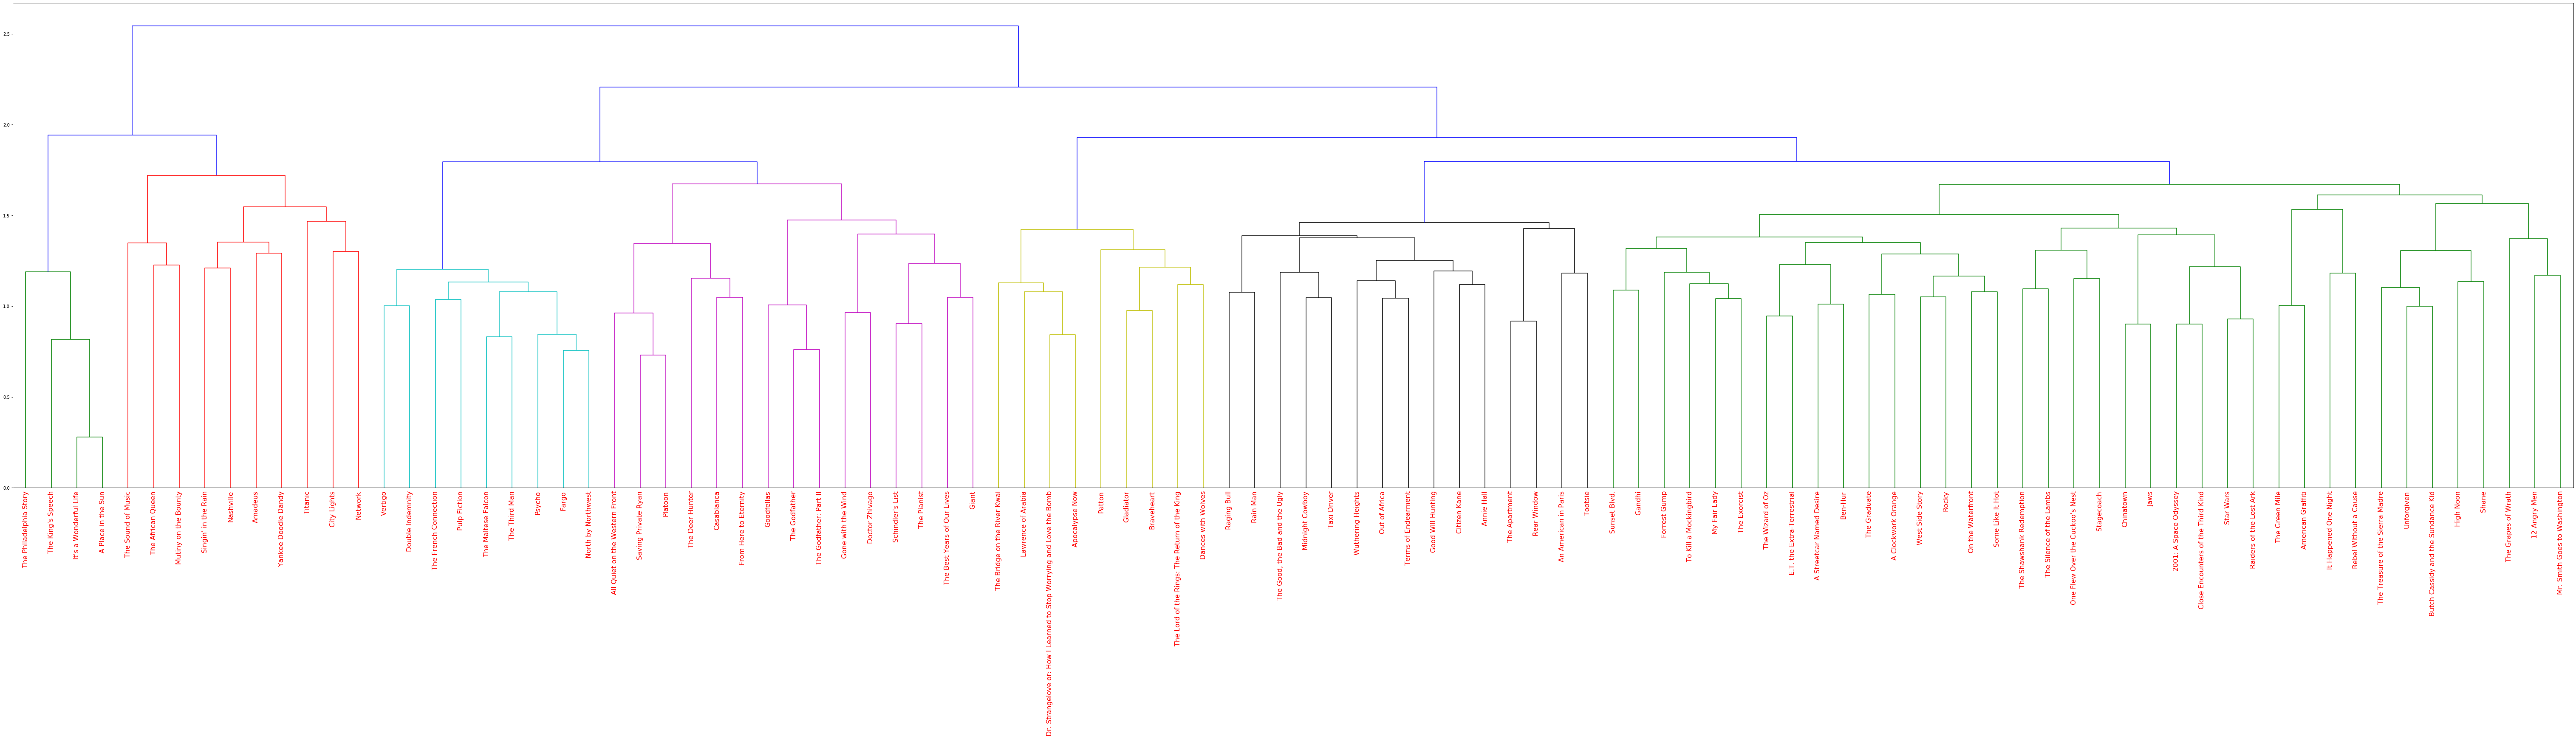

In [ ]:
# creating a dendrogram using the similarity matrix

mergers = linkage(sim_dist, method='complete')


dendrogram_graph = dendrogram(mergers,
               labels=[x for x in movies_df["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
            get_leaves = True
)
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)
plt.show()



# Print Similar movies

In [ ]:
# Evaluating our model by predicting the most similar movie to a given movie Godfather based on the similarity scores.
similar_movie = [None] * 100
for movie in range(0,100):
    similar = sim_dist[movie]
    similar[movie] = 1000
    similar_movie[movie] = movies_df.iloc[np.where(similar == min(similar))[0][0],1]
 
movies_df["similar_movie"] = similar_movie    
    
    

In [ ]:
# generating the movie dataframe with cluster number and most similar movie of each film

movies_df

,rank,title,genre,wiki_plot,imdb_plot,plot,cluster,similar_movie
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit...",1,The Godfather: Part II
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ...",1,A Clockwork Orange
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the...",2,The Pianist
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight...",1,The Godfather: Part II
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...,2,From Here to Eternity
5,5,One Flew Over the Cuckoo's Nest,[u' Drama'],"In 1963 Oregon, Randle Patrick ""Mac"" McMurphy ...","In 1963 Oregon, Randle Patrick McMurphy (Nicho...","In 1963 Oregon, Randle Patrick ""Mac"" McMurphy ...",1,A Clockwork Orange
6,6,Gone with the Wind,"[u' Drama', u' Romance', u' War']",\r\nPart 1\r\n \r\n Part 1 Part 1 \r\n \r...,"The film opens in Tara, a cotton plantation ow...",\r\nPart 1\r\n \r\n Part 1 Part 1 \r\n \r...,1,The Best Years of Our Lives
7,7,Citizen Kane,"[u' Drama', u' Mystery']",\r\n\r\n\r\n\r\nOrson Welles as Charles Foster...,"It's 1941, and newspaper tycoon Charles Foster...",\r\n\r\n\r\n\r\nOrson Welles as Charles Foster...,1,The Godfather: Part II
8,8,The Wizard of Oz,"[u' Adventure', u' Family', u' Fantasy', u' Mu...",The film starts in sepia-tinted Kansas in the ...,Dorothy Gale (Judy Garland) is an orphaned tee...,The film starts in sepia-tinted Kansas in the ...,4,E.T. the Extra-Terrestrial
9,9,Titanic,"[u' Drama', u' Romance']","In 1996, treasure hunter Brock Lovett and his ...","In 1996, treasure hunter Brock Lovett and his ...","In 1996, treasure hunter Brock Lovett and his ...",1,Star Wars


In [ ]:
# printing plot of a movie Godfather using wikipedia package
print(wikipedia.WikipediaPage('The Godfather').section('Plot'))

In 1945, at his daughter Connie's wedding to Carlo Rizzi, Don Vito Corleone hears requests in his role as head of a New York crime family. His youngest son, Michael, who was a Marine during World War II, introduces his girlfriend, Kay Adams, to his family at the reception. Johnny Fontane, a famous singer and Vito's godson, seeks Vito's help in securing a movie role; Vito dispatches his consigliere, Tom Hagen, to Los Angeles to persuade studio head Jack Woltz to give Johnny the part. Woltz refuses until he wakes up in bed with the severed head of his prized stallion.
Shortly before Christmas, drug baron Virgil "The Turk" Sollozzo, backed by the Tattaglia crime family, asks Vito for investment in his narcotics business and protection through his political connections. Wary of involvement in a dangerous new trade that risks alienating political insiders, Vito declines. Suspicious, Vito sends his enforcer, Luca Brasi, to spy on them. Brasi is garroted during his first meeting with Bruno Ta

# Evaluation using Elbow Test

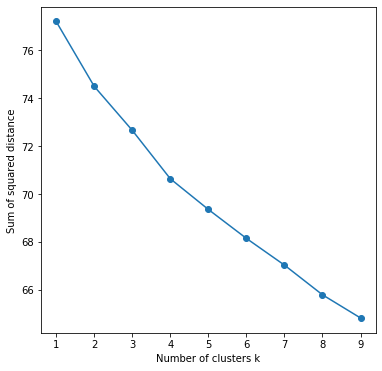

In [ ]:

# evaluating our model using elbow method and this plot shows that the choice of k = 5 was optimal 
#as we see a significant drop in the error on k = 5

sse = []
list_k = list(range(1,10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(matrix_tfidf)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))

plt.plot(list_k, sse, '-o')

plt.xlabel(r'Number of clusters k')

plt.ylabel('Sum of squared distance');